# DATA102 S11 Project Notebook
## By: Mantaring, Seagan, Subido, Tagabucba, Tio

# Problem Statement
The Philippines' economic development is dependent on its ability to transform its industrial structure from low-value-added sectors (ex., Agriculture) to high-value-added and complex sectors (ex., Manufacturing). This process, known as structural transformation, is instrumental in achieving sustained economic growth and development. However, the Philippines has historically exhibited an "industry-skipping" tendency, which has hindered its progress towards achieving a more advanced industrial base.


### Project Objectives
Hence, the objective is to analyze the nature of the products exported by the Philippines and to understand the patterns of product complexity in its trade with countries where it has Free Trade Agreements (FTAs) with. This analysis will leverage annual trade export value data at the two-digit level Harmonized System Code (HSC) retrieved from the International Trade Centre (ITC) Trade Map, covering the period from 2012 to 2022.

By examining the export value and quantity of 99 different products, this project aims to:

*   Identify the types of products commonly exported by the Philippines and their respective complexities.
*   Assess the growth trajectory of per output value-added in both agricultural and manufacturing sectors.
*   Determine the share of complex products in the Philippines' trade portfolio and how it has evolved over the observed period.
*   Provide insights into the structural transformation process of the Philippine economy and its implications for industrial policy development.

### Hypothesis
We hypothesize that the Philippines will exhibit slow growth in per output value-added and a modest increase in the share of complex products in trade. Specifically, we expect that the manufacturing sector's value-added will grow faster than that of the agricultural sector, which may experience stagnant or declining value-added growth. These insights are crucial for informing policy recommendations aimed at accelerating the structural transformation of the Philippine economy and enhancing its industrial competitiveness.

Understanding these dynamics will provide a clearer path for the Philippines to develop a more effective industrial policy, guiding the economy towards higher-value-added production and fostering sustainable economic growth.

# Data Collection

We collate data on Philippine **export values** and **export quantities** to ASEAN countries and key trading partners such as Australia, China, Hongkong, India, Japan, South Korea and New Zealand by **subproduct** from **2012-2022**, using the website https://www.trademap.org/. **Ninety-nine (99) products** are identified, which are aggregations of the **nine thousand, nine hundred ninety nine (9999) sub-products** to common groupings (e.g. subproducts *oats*, *barley*, and *wheat* are grouped to product *rice*). These products and sub-products are classified using the **Harmonized System Code (HSC)**, with products being encoded using a **2-digit product classification code** and with the sub-products being encoded using a **4-digit product classification code.**

# Data Preprocessing



#Mounting Google Drive

We first mount the group's Google drive to access the XLSX file content gathered from https://www.trademap.org/. Each XLSX files contain either export value or quantity of Philippine export to any one country for all subproducts from 2012-2022.

In [1]:
import pandas as pd
from google.colab import drive

# Mounting Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


#Defining Paths to the XLSX file content

The XLSX files are then located through paths. Dictionaries are used to store the names of countries as keys, where the list structure contains two elements: (i) the XLSX file containing export values of any one country, and (ii) the XLSX file containing the export quantities of that same country.

In [2]:
# Defining Paths
paths = {
    "myanmar": ['/content/drive/My Drive/final project/myanmar.xlsx', '/content/drive/My Drive/final project/myanmar (1).xlsx'],
    "newzealand": ['/content/drive/My Drive/final project/new zealand.xlsx', '/content/drive/My Drive/final project/new zealand (1).xlsx'],
    "australia": ['/content/drive/My Drive/final project/australia.xlsx', '/content/drive/My Drive/final project/australia (1).xlsx'],
    "southkorea": ['/content/drive/My Drive/final project/south korea.xlsx', '/content/drive/My Drive/final project/south korea (1).xlsx'],
    "japan": ['/content/drive/My Drive/final project/japan.xlsx', '/content/drive/My Drive/final project/japan (1).xlsx'],
    "india": ['/content/drive/My Drive/final project/india.xlsx', '/content/drive/My Drive/final project/india (1).xlsx'],
    "hongkong": ['/content/drive/My Drive/final project/hongkong.xlsx', '/content/drive/My Drive/final project/hongkong (1).xlsx'],
    "china": ['/content/drive/My Drive/final project/china.xlsx', '/content/drive/My Drive/final project/china (1).xlsx'],
    "malaysia": ['/content/drive/My Drive/final project/malaysia.xlsx', '/content/drive/My Drive/final project/malaysia (1).xlsx'],
    "vietnam": ['/content/drive/My Drive/final project/vietnam.xlsx', '/content/drive/My Drive/final project/vietnam (1).xlsx'],
    "indonesia": ['/content/drive/My Drive/final project/indonesia.xlsx', '/content/drive/My Drive/final project/indonesia (1).xlsx'],
    "brunei": ['/content/drive/My Drive/final project/brunei darussalam.xlsx', '/content/drive/My Drive/final project/brunei darussalam (1).xlsx'],
    "cambodia": ['/content/drive/My Drive/final project/cambodia.xlsx', '/content/drive/My Drive/final project/cambodia (1).xlsx'],
    "singapore": ['/content/drive/My Drive/final project/singapore.xlsx', '/content/drive/My Drive/final project/singapore (1).xlsx']
}


#Processing Export Value and Quantity Data

We define a function storing the read excel export value and quantity files to two dataframes, namely *value_df* and *quantity_df*, respectively, and for each country. These two dataframes are merged based on their Product code (here, a Product code is 4-digit product classification code, hence these are subproducts).

For products with 3-digit Product code assignments, their Product codes are transformed to 4-digit strings. A column is then created for assigning these subproducts to their respective product groups/categories based on the HS 2-digit classification.

#Calculation of Average Value (Value per Quantity) as proxy for Complexity of Products

For each year, the average value of a product is calculated by dividing a country's export value by export quantity. Country name is then assigned to create a more complete dataframe including export values, quantities, and average values of each country for the years 2012-2022.

In [3]:
# Merging and processing for calculation of Average Value for years 2012-2022 as proxy for Complexity
def process_country_data(value_path, quantity_path, country_name):
    value_df = pd.read_excel(value_path)
    quantity_df = pd.read_excel(quantity_path)
    merged_df = pd.merge(value_df, quantity_df, on='Product code', how='inner')

    # Convert 3-digit product codes to 4-digit product codes
    merged_df['Product code'] = merged_df['Product code'].apply(lambda x: f'{x:04}')

    # Create 2-digit Product code
    merged_df['2-digit Product code'] = merged_df['Product code'].str[:2]

    for year in range(2012, 2023):
        merged_df[f'Average Value in {year}'] = merged_df[f'Value in {year}'] / merged_df[f'Quantity in {year}']

    merged_df['Country'] = country_name
    return merged_df[['Product label_x', 'Product code', '2-digit Product code', 'Country'] +
                     [f'Value in {year}' for year in range(2012, 2023)] +
                     [f'Quantity in {year}' for year in range(2012, 2023)] +
                     [f'Average Value in {year}' for year in range(2012, 2023)]]

# Processing and storing for each country
countries = {country: process_country_data(paths[country][0], paths[country][1], country) for country in paths}

# Concatenating all dataframes into one
exportdata = pd.concat(countries.values(), ignore_index=True)

# Aggregating data by 'Country', '2-digit Product code', and year
aggregated_data = exportdata.groupby(['Country', '2-digit Product code']).agg({
    **{f'Value in {year}': 'sum' for year in range(2012, 2023)},
    **{f'Quantity in {year}': 'sum' for year in range(2012, 2023)},
    **{f'Average Value in {year}': 'mean' for year in range(2012, 2023)},
}).reset_index()

# Display the aggregated dataframe
aggregated_data

,Country,2-digit Product code,Value in 2012,Value in 2013,Value in 2014,Value in 2015,Value in 2016,Value in 2017,Value in 2018,Value in 2019,...,Average Value in 2013,Average Value in 2014,Average Value in 2015,Average Value in 2016,Average Value in 2017,Average Value in 2018,Average Value in 2019,Average Value in 2020,Average Value in 2021,Average Value in 2022
0,australia,10,14.0,29.0,20.0,0.0,5.0,4.0,0.0,7.0,...,2.900000,0.465116,NaN,1.250000,2.000000,NaN,2.333333,NaN,2.000000,inf
1,australia,11,290.0,549.0,192.0,722.0,545.0,469.0,1069.0,854.0,...,2.935829,2.538265,2.544993,1.772109,1.675000,1.769868,1.049945,inf,1.799694,inf
2,australia,12,551.0,636.0,399.0,36.0,0.0,0.0,0.0,3.0,...,inf,3.740472,7.200000,NaN,NaN,NaN,inf,inf,5.333333,inf
3,australia,13,5146.0,5700.0,7235.0,6631.0,6167.0,5483.0,7305.0,5662.0,...,7.569721,7.428131,7.351441,6.754655,6.465802,7.837983,8.363368,8.080395,7.569959,inf
4,australia,14,7.0,0.0,1.0,0.0,0.0,10.0,4.0,0.0,...,NaN,1.000000,NaN,NaN,3.333333,0.500000,NaN,4.625000,1.000000,1.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,vietnam,94,211.0,332.0,705.0,922.0,473.0,332.0,179.0,662.0,...,8.732417,3.102443,inf,9.312500,9.329286,inf,62.309117,7.035551,2.423587,inf
1309,vietnam,95,1629.0,772.0,553.0,1042.0,859.0,527.0,990.0,555.0,...,inf,inf,9.223297,15.611671,inf,16.418081,inf,inf,11.784598,5.579487
1310,vietnam,96,186.0,873.0,169.0,121.0,12.0,73.0,1775.0,8400.0,...,inf,inf,inf,inf,inf,inf,inf,inf,12.481574,inf
1311,vietnam,97,0.0,0.0,6.0,0.0,1.0,47.0,287.0,0.0,...,NaN,inf,NaN,0.500000,1.807692,5.235714,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

# Specifying relevant columns

We specify the relevant columns. For this case, the annual average value for each product code per country is calculated.

In [4]:
# Specify the columns you want in the new DataFrame
columns_to_include = ['Country', '2-digit Product code'] + [f'Value in {year}' for year in range(2012, 2023)]

# Create a new DataFrame with only the specified columns
values_df = aggregated_data[columns_to_include]

values_df['Average Annual Value'] = values_df[[f'Value in {year}' for year in range(2012, 2023)]].mean(axis=1)

# Display the new DataFrame
values_df

<ipython-input-4-dc86cf41338b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values_df['Average Annual Value'] = values_df[[f'Value in {year}' for year in range(2012, 2023)]].mean(axis=1)


,Country,2-digit Product code,Value in 2012,Value in 2013,Value in 2014,Value in 2015,Value in 2016,Value in 2017,Value in 2018,Value in 2019,Value in 2020,Value in 2021,Value in 2022,Average Annual Value
0,australia,10,14.0,29.0,20.0,0.0,5.0,4.0,0.0,7.0,0.0,2.0,1.0,7.454545
1,australia,11,290.0,549.0,192.0,722.0,545.0,469.0,1069.0,854.0,399.0,145.0,376.0,510.000000
2,australia,12,551.0,636.0,399.0,36.0,0.0,0.0,0.0,3.0,4.0,19.0,21.0,151.727273
3,australia,13,5146.0,5700.0,7235.0,6631.0,6167.0,5483.0,7305.0,5662.0,5729.0,7358.0,10408.0,6620.363636
4,australia,14,7.0,0.0,1.0,0.0,0.0,10.0,4.0,0.0,25.0,1.0,13.0,5.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,vietnam,94,211.0,332.0,705.0,922.0,473.0,332.0,179.0,662.0,572.0,125.0,84.0,417.909091
1309,vietnam,95,1629.0,772.0,553.0,1042.0,859.0,527.0,990.0,555.0,285.0,387.0,523.0,738.363636
1310,vietnam,96,186.0,873.0,169.0,121.0,12.0,73.0,1775.0,8400.0,2863.0,1431.0,2512.0,1674.090909
1311,vietnam,97,0.0,0.0,6.0,0.0,1.0,47.0,287.0,0.0,0.0,0.0,0.0,31.000000


# Summary Statistics

The following is the summary statistics of the trade data between the Philippines and 16 countries based on trade value. There are 14 unique countries and 97 unique 2-digit product codes in the dataset, with 'brunei' and the product code '10' appearing most frequently. The trade values exhibit substantial variability, with mean values ranging from approximately 24,219 to 35,864 over the years 2012 to 2022, and standard deviations indicating high dispersion. Minimum values are consistently zero, highlighting numerous instances of no trade, while maximum values reach up to millions, pointing to significant outliers. The dataset shows a considerable disparity in trade amounts, underscored by the wide range between minimum and maximum values and the high standard deviations. The average values further emphasize this disparity, with a mean of about 29,229 and a standard deviation of approximately 250,058.


In [5]:
values_df.describe(include='all')  # Summary statistics for all columns

,Country,2-digit Product code,Value in 2012,Value in 2013,Value in 2014,Value in 2015,Value in 2016,Value in 2017,Value in 2018,Value in 2019,Value in 2020,Value in 2021,Value in 2022,Average Annual Value
count,1313,1313,1.313000e+03,1.313000e+03,1.313000e+03,1.313000e+03,1.313000e+03,1.313000e+03,1.313000e+03,1.313000e+03,1.313000e+03,1.313000e+03,1.313000e+03,1.313000e+03
unique,14,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,brunei,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.421902e+04,2.651697e+04,2.908575e+04,2.636214e+04,2.564011e+04,2.778863e+04,3.001826e+04,3.188354e+04,3.004117e+04,3.410813e+04,3.586394e+04,2.922979e+04
std,NaN,NaN,1.894571e+05,2.012775e+05,2.219857e+05,2.361556e+05,2.301522e+05,2.489957e+05,2.718184e+05,2.876837e+05,2.820293e+05,3.242360e+05,3.530644e+05,2.500584e+05
min,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.418182e+01
50%,NaN,NaN,1.410000e+02,1.400000e+02,1.970000e+02,1.550000e+02,1.370000e+02,1.230000e+02,1.800000e+02,1.610000e+02,1.390000e+02,1.350000e+02,1.310000e+02,3.011818e+02
75%,NaN,NaN,2.159000e+03,2.216000e+03,2.471000e+03,1.915000e+03,2.114000e+03,2.250000e+03,2.581000e+03,2.806000e+03,2.378000e+03,2.830000e+03,3.162000e+03,3.368727e+03


The following are the data types for the values dataframe. There are two categorical variables in Country and 2-Digit Product Code. The rest are numerical variables.

In [6]:
values_df.info()  # Summary statistics for all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               1313 non-null   object 
 1   2-digit Product code  1313 non-null   object 
 2   Value in 2012         1313 non-null   float64
 3   Value in 2013         1313 non-null   float64
 4   Value in 2014         1313 non-null   float64
 5   Value in 2015         1313 non-null   float64
 6   Value in 2016         1313 non-null   float64
 7   Value in 2017         1313 non-null   float64
 8   Value in 2018         1313 non-null   float64
 9   Value in 2019         1313 non-null   float64
 10  Value in 2020         1313 non-null   float64
 11  Value in 2021         1313 non-null   float64
 12  Value in 2022         1313 non-null   float64
 13  Average Annual Value  1313 non-null   float64
dtypes: float64(12), object(2)
memory usage: 143.7+ KB


# Importing Visualization Libraries

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

Reseting the Index for the dataframe

In [8]:
values_df = values_df.reset_index()
values_df

,index,Country,2-digit Product code,Value in 2012,Value in 2013,Value in 2014,Value in 2015,Value in 2016,Value in 2017,Value in 2018,Value in 2019,Value in 2020,Value in 2021,Value in 2022,Average Annual Value
0,0,australia,10,14.0,29.0,20.0,0.0,5.0,4.0,0.0,7.0,0.0,2.0,1.0,7.454545
1,1,australia,11,290.0,549.0,192.0,722.0,545.0,469.0,1069.0,854.0,399.0,145.0,376.0,510.000000
2,2,australia,12,551.0,636.0,399.0,36.0,0.0,0.0,0.0,3.0,4.0,19.0,21.0,151.727273
3,3,australia,13,5146.0,5700.0,7235.0,6631.0,6167.0,5483.0,7305.0,5662.0,5729.0,7358.0,10408.0,6620.363636
4,4,australia,14,7.0,0.0,1.0,0.0,0.0,10.0,4.0,0.0,25.0,1.0,13.0,5.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,1308,vietnam,94,211.0,332.0,705.0,922.0,473.0,332.0,179.0,662.0,572.0,125.0,84.0,417.909091
1309,1309,vietnam,95,1629.0,772.0,553.0,1042.0,859.0,527.0,990.0,555.0,285.0,387.0,523.0,738.363636
1310,1310,vietnam,96,186.0,873.0,169.0,121.0,12.0,73.0,1775.0,8400.0,2863.0,1431.0,2512.0,1674.090909
1311,1311,vietnam,97,0.0,0.0,6.0,0.0,1.0,47.0,287.0,0.0,0.0,0.0,0.0,31.000000


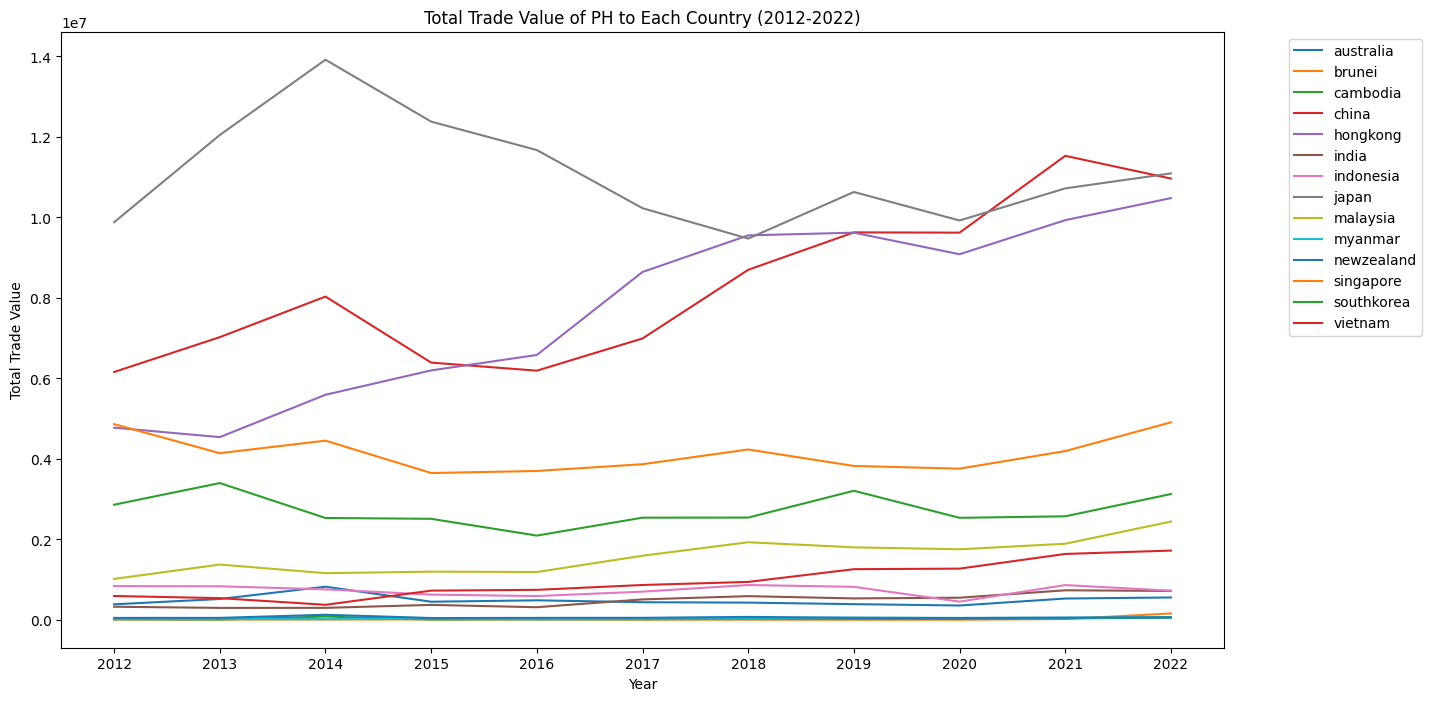

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
for country in values_df['Country'].unique():
    country_data = values_df[values_df['Country'] == country]
    yearly_values = country_data[['Value in 2012', 'Value in 2013', 'Value in 2014', 'Value in 2015',
                                  'Value in 2016', 'Value in 2017', 'Value in 2018', 'Value in 2019',
                                  'Value in 2020', 'Value in 2021', 'Value in 2022',]].sum()
    plt.plot(yearly_values, label=country)

plt.xlabel('Year')
plt.ylabel('Total Trade Value')
plt.title('Total Trade Value of PH to Each Country (2012-2022)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(len(yearly_values)), range(2012, 2023))
plt.show()

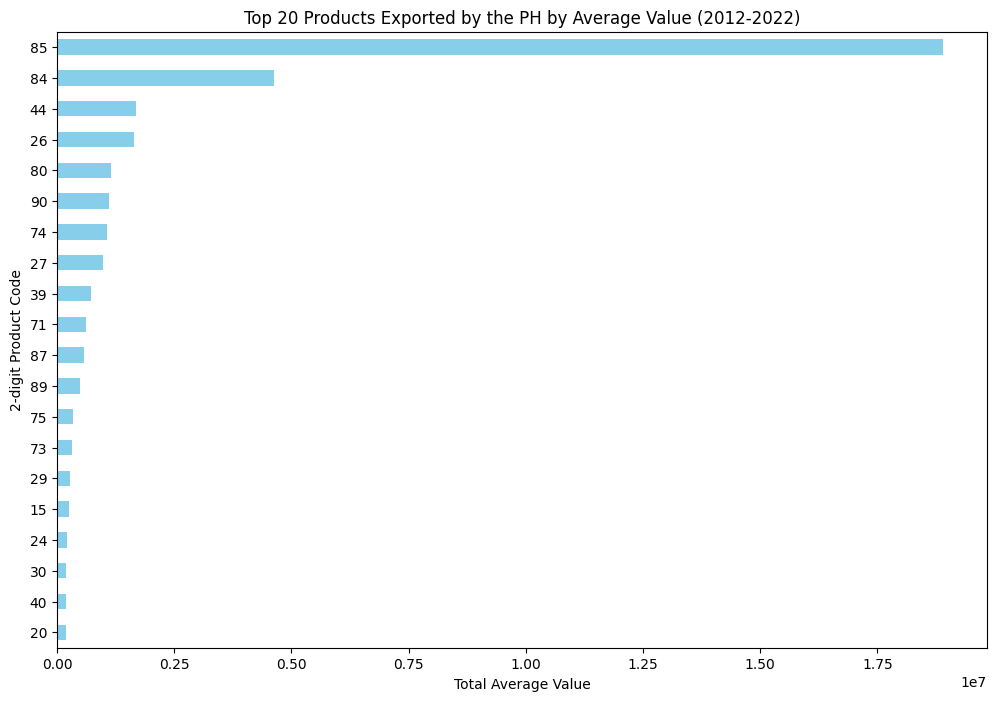

In [10]:
import matplotlib.pyplot as plt

# Assuming top_products is already computed
top_products = values_df.groupby('2-digit Product code')['Average Annual Value'].sum().sort_values(ascending=False)
top_products_top10 = top_products.head(20)  # Top 10 products

# Create horizontal bar plot
plt.figure(figsize=(12, 8))
top_products_top10.plot(kind='barh', color='skyblue')
plt.xlabel('Total Average Value')
plt.ylabel('2-digit Product Code')
plt.title('Top 20 Products Exported by the PH by Average Value (2012-2022)')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.show()

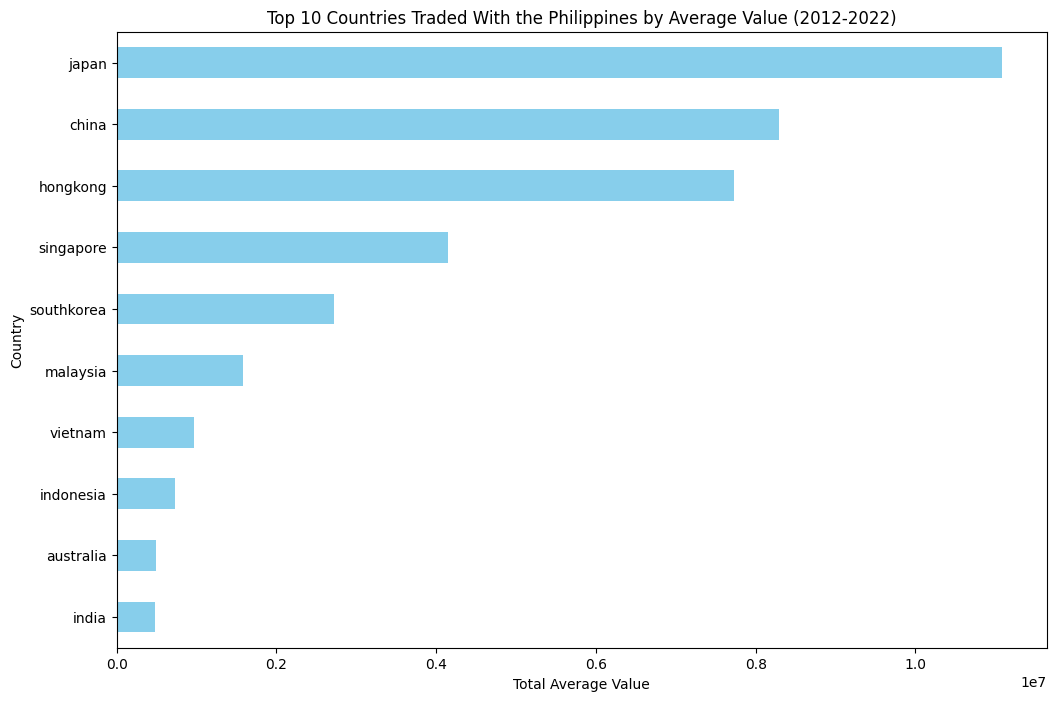

In [11]:
import matplotlib.pyplot as plt

# Assuming top_products is already computed
top_countries = values_df.groupby('Country')['Average Annual Value'].sum().sort_values(ascending=False)
top_countries_top10 = top_countries.head(10)  # Top 10 products

# Create horizontal bar plot
plt.figure(figsize=(12, 8))
top_countries_top10.plot(kind='barh', color='skyblue')
plt.xlabel('Total Average Value')
plt.ylabel('Country')
plt.title('Top 10 Countries Traded With the Philippines by Average Value (2012-2022)')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.show()

# Specifying another column: Quantity

We specify another aspect of the aggregated dataset, now in terms of trade quantity data of Philippine exports to the chosen 16 countries.

In [12]:
# Specify the columns you want in the new DataFrame
columns_to_include = ['Country', '2-digit Product code'] + [f'Quantity in {year}' for year in range(2012, 2023)]

# Create a new DataFrame with only the specified columns
quantity_df = aggregated_data[columns_to_include]

quantity_df['Average Quantity'] = quantity_df[[f'Quantity in {year}' for year in range(2012, 2023)]].mean(axis=1)

# Display the new DataFrame
quantity_df

<ipython-input-12-d9b7bbb475fa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantity_df['Average Quantity'] = quantity_df[[f'Quantity in {year}' for year in range(2012, 2023)]].mean(axis=1)


,Country,2-digit Product code,Quantity in 2012,Quantity in 2013,Quantity in 2014,Quantity in 2015,Quantity in 2016,Quantity in 2017,Quantity in 2018,Quantity in 2019,Quantity in 2020,Quantity in 2021,Quantity in 2022,Average Quantity
0,australia,10,7.0,10.0,43.0,0.0,4.0,2.0,0.0,3.0,0.0,1.0,0.0,6.363636
1,australia,11,158.0,187.0,102.0,369.0,299.0,280.0,604.0,689.0,347.0,112.0,145.0,299.272727
2,australia,12,57.0,168.0,77.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,28.545455
3,australia,13,768.0,753.0,974.0,902.0,913.0,848.0,932.0,677.0,709.0,972.0,980.0,857.090909
4,australia,14,6.0,0.0,1.0,0.0,0.0,3.0,8.0,0.0,9.0,1.0,7.0,3.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,vietnam,94,58.0,101.0,519.0,165.0,61.0,71.0,35.0,36.0,182.0,76.0,19.0,120.272727
1309,vietnam,95,110.0,106.0,93.0,161.0,153.0,116.0,116.0,36.0,40.0,48.0,86.0,96.818182
1310,vietnam,96,18.0,6.0,29.0,11.0,21.0,87.0,509.0,2192.0,821.0,339.0,727.0,432.727273
1311,vietnam,97,0.0,0.0,0.0,0.0,2.0,26.0,49.0,0.0,0.0,0.0,0.0,7.000000


Reseting index

In [13]:
quantity_df = quantity_df.reset_index()
quantity_df

,index,Country,2-digit Product code,Quantity in 2012,Quantity in 2013,Quantity in 2014,Quantity in 2015,Quantity in 2016,Quantity in 2017,Quantity in 2018,Quantity in 2019,Quantity in 2020,Quantity in 2021,Quantity in 2022,Average Quantity
0,0,australia,10,7.0,10.0,43.0,0.0,4.0,2.0,0.0,3.0,0.0,1.0,0.0,6.363636
1,1,australia,11,158.0,187.0,102.0,369.0,299.0,280.0,604.0,689.0,347.0,112.0,145.0,299.272727
2,2,australia,12,57.0,168.0,77.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,28.545455
3,3,australia,13,768.0,753.0,974.0,902.0,913.0,848.0,932.0,677.0,709.0,972.0,980.0,857.090909
4,4,australia,14,6.0,0.0,1.0,0.0,0.0,3.0,8.0,0.0,9.0,1.0,7.0,3.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,1308,vietnam,94,58.0,101.0,519.0,165.0,61.0,71.0,35.0,36.0,182.0,76.0,19.0,120.272727
1309,1309,vietnam,95,110.0,106.0,93.0,161.0,153.0,116.0,116.0,36.0,40.0,48.0,86.0,96.818182
1310,1310,vietnam,96,18.0,6.0,29.0,11.0,21.0,87.0,509.0,2192.0,821.0,339.0,727.0,432.727273
1311,1311,vietnam,97,0.0,0.0,0.0,0.0,2.0,26.0,49.0,0.0,0.0,0.0,0.0,7.000000


For quantities, the mean ranges from 35,393 to 55,360, with even greater variability shown by standard deviations up to 1,217,931. Minimum quantities are zero, indicating no trade in many instances, while maximum quantities reach tens of millions, reflecting significant outliers. The average quantity has a mean of approximately 44,670 and a high standard deviation of around 950,810. These statistics suggest a wide range of trade volumes across different product codes and years.

In [14]:
quantity_df.describe(include='all')  # Summary statistics for all columns

,index,Country,2-digit Product code,Quantity in 2012,Quantity in 2013,Quantity in 2014,Quantity in 2015,Quantity in 2016,Quantity in 2017,Quantity in 2018,Quantity in 2019,Quantity in 2020,Quantity in 2021,Quantity in 2022,Average Quantity
count,1313.000000,1313,1313,1.313000e+03,1.313000e+03,1.313000e+03,1.313000e+03,1.313000e+03,1.313000e+03,1.313000e+03,1.313000e+03,1.313000e+03,1.313000e+03,1.313000e+03,1.313000e+03
unique,NaN,14,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,brunei,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,97,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,656.000000,NaN,NaN,3.539350e+04,5.034268e+04,5.482904e+04,3.518727e+04,4.134555e+04,3.835913e+04,3.485867e+04,4.548166e+04,5.302513e+04,5.535972e+04,4.719617e+04,4.467077e+04
std,379.174762,NaN,NaN,7.836344e+05,1.175941e+06,1.158036e+06,7.437503e+05,8.121516e+05,8.218435e+05,7.171486e+05,9.195844e+05,1.104721e+06,1.217931e+06,1.067219e+06,9.508100e+05
min,0.000000,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,328.000000,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.363636e+00
50%,656.000000,NaN,NaN,3.600000e+01,3.200000e+01,4.300000e+01,3.000000e+01,2.900000e+01,2.700000e+01,3.500000e+01,2.800000e+01,2.300000e+01,2.400000e+01,2.200000e+01,6.763636e+01
75%,984.000000,NaN,NaN,7.620000e+02,7.400000e+02,8.880000e+02,6.610000e+02,7.450000e+02,8.280000e+02,7.920000e+02,6.660000e+02,6.020000e+02,7.700000e+02,6.800000e+02,1.153545e+03


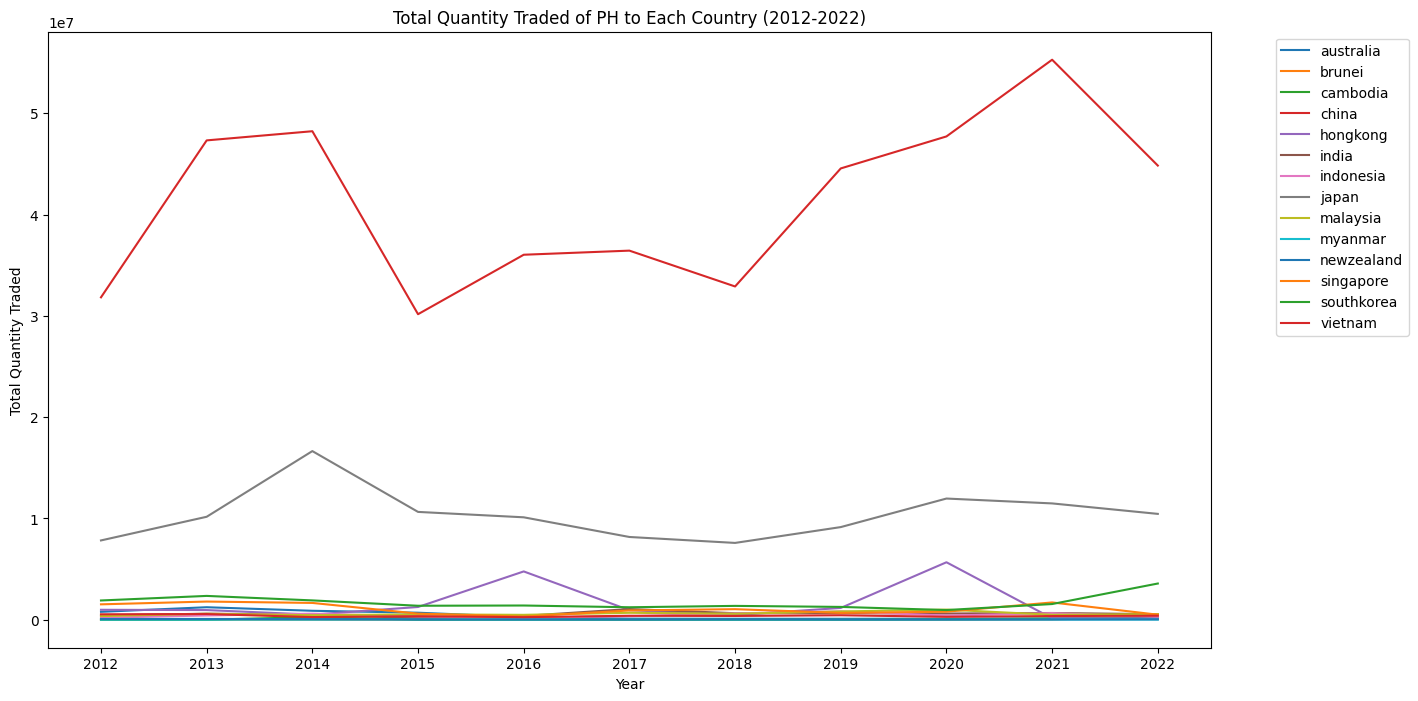

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
for country in quantity_df['Country'].unique():
    country_data = quantity_df[quantity_df['Country'] == country]
    yearly_values = country_data[['Quantity in 2012', 'Quantity in 2013', 'Quantity in 2014', 'Quantity in 2015',
                                  'Quantity in 2016', 'Quantity in 2017', 'Quantity in 2018', 'Quantity in 2019',
                                  'Quantity in 2020', 'Quantity in 2021', 'Quantity in 2022',]].sum()
    plt.plot(yearly_values, label=country)

plt.xlabel('Year')
plt.ylabel('Total Quantity Traded')
plt.title('Total Quantity Traded of PH to Each Country (2012-2022)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(len(yearly_values)), range(2012, 2023))
plt.show()

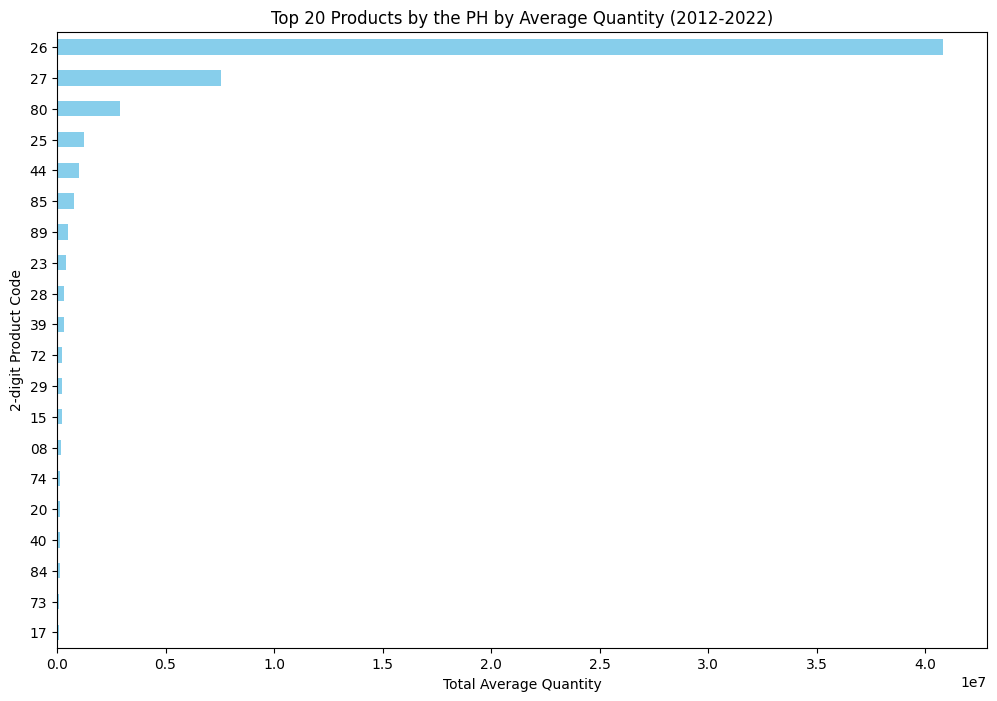

In [16]:
import matplotlib.pyplot as plt

# Assuming top_products is already computed
top_products = quantity_df.groupby('2-digit Product code')['Average Quantity'].sum().sort_values(ascending=False)
top_products_top10 = top_products.head(20)  # Top 10 products

# Create horizontal bar plot
plt.figure(figsize=(12, 8))
top_products_top10.plot(kind='barh', color='skyblue')
plt.xlabel('Total Average Quantity')
plt.ylabel('2-digit Product Code')
plt.title('Top 20 Products by the PH by Average Quantity (2012-2022)')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.show()

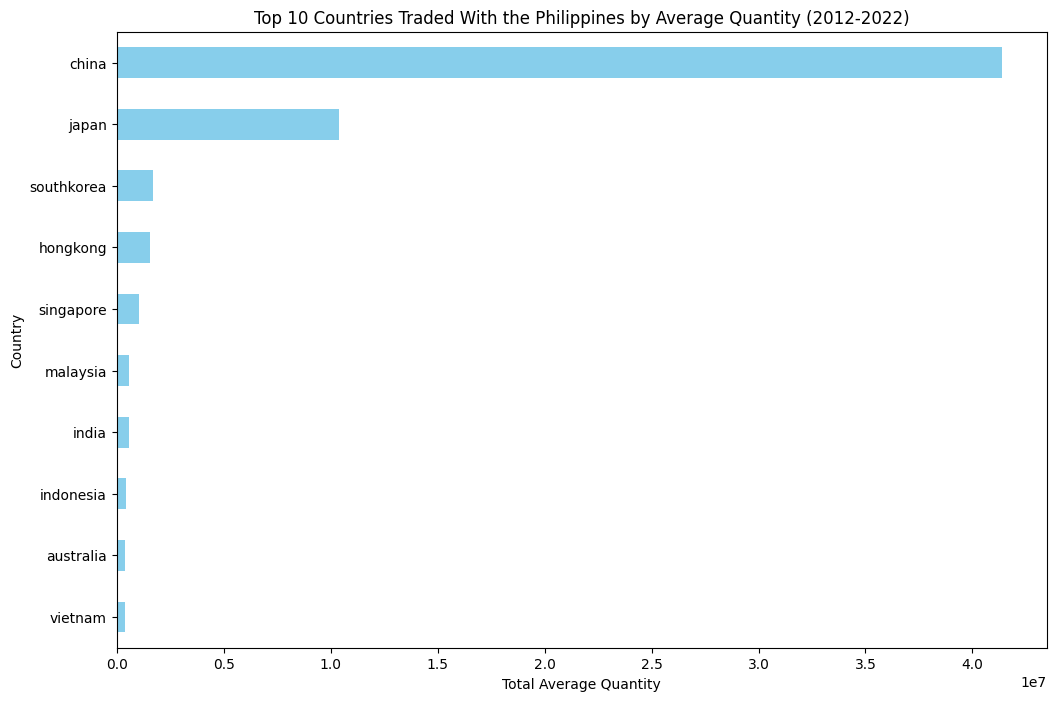

In [17]:
import matplotlib.pyplot as plt

# Assuming top_products is already computed
top_countries = quantity_df.groupby('Country')['Average Quantity'].sum().sort_values(ascending=False)
top_countries_top10 = top_countries.head(10)  # Top 10 products

# Create horizontal bar plot
plt.figure(figsize=(12, 8))
top_countries_top10.plot(kind='barh', color='skyblue')
plt.xlabel('Total Average Quantity')
plt.ylabel('Country')
plt.title('Top 10 Countries Traded With the Philippines by Average Quantity (2012-2022)')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.show()

# Specifying columns: Product Complexity Value

In answering our research objectives, we now look at the product complexity value or the value-added per quantity of each product traded/exported by the Philippines.

In [18]:
# Specify the columns you want in the new DataFrame
columns_to_include = ['Country', '2-digit Product code'] + [f'Average Value in {year}' for year in range(2012, 2023)]

# Create a new DataFrame with only the specified columns
complexity_df = aggregated_data[columns_to_include]

complexity_df['Product Complexity Value'] = complexity_df[[f'Average Value in {year}' for year in range(2012, 2023)]].mean(axis=1)

# Display the new DataFrame
complexity_df

<ipython-input-18-9b2598ac3989>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complexity_df['Product Complexity Value'] = complexity_df[[f'Average Value in {year}' for year in range(2012, 2023)]].mean(axis=1)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Country,2-digit Product code,Average Value in 2012,Average Value in 2013,Average Value in 2014,Average Value in 2015,Average Value in 2016,Average Value in 2017,Average Value in 2018,Average Value in 2019,Average Value in 2020,Average Value in 2021,Average Value in 2022,Product Complexity Value
0,australia,10,inf,2.900000,0.465116,NaN,1.250000,2.000000,NaN,2.333333,NaN,2.000000,inf,inf
1,australia,11,1.560945,2.935829,2.538265,2.544993,1.772109,1.675000,1.769868,1.049945,inf,1.799694,inf,inf
2,australia,12,inf,inf,3.740472,7.200000,NaN,NaN,NaN,inf,inf,5.333333,inf,inf
3,australia,13,6.700521,7.569721,7.428131,7.351441,6.754655,6.465802,7.837983,8.363368,8.080395,7.569959,inf,inf
4,australia,14,1.166667,NaN,1.000000,NaN,NaN,3.333333,0.500000,NaN,4.625000,1.000000,1.857143,1.92602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,vietnam,94,20.010417,8.732417,3.102443,inf,9.312500,9.329286,inf,62.309117,7.035551,2.423587,inf,inf
1309,vietnam,95,inf,inf,inf,9.223297,15.611671,inf,16.418081,inf,inf,11.784598,5.579487,inf
1310,vietnam,96,inf,inf,inf,inf,inf,inf,inf,inf,inf,12.481574,inf,inf
1311,vietnam,97,NaN,NaN,inf,NaN,0.500000,1.807692,5.235714,NaN,NaN,NaN,NaN,inf


Replacing inf and missing values with 0.

In [19]:
import numpy as np
complexity_df.replace(np.nan, 0.0, inplace=True)

complexity_df.replace([np.inf, -np.inf], 0.0, inplace=True)

<ipython-input-19-6069d9b79f70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complexity_df.replace(np.nan, 0.0, inplace=True)
<ipython-input-19-6069d9b79f70>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complexity_df.replace([np.inf, -np.inf], 0.0, inplace=True)


In [20]:
complexity_df.describe(include='all')  # Summary statistics for all columns

,Country,2-digit Product code,Average Value in 2012,Average Value in 2013,Average Value in 2014,Average Value in 2015,Average Value in 2016,Average Value in 2017,Average Value in 2018,Average Value in 2019,Average Value in 2020,Average Value in 2021,Average Value in 2022,Product Complexity Value
count,1313,1313,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000
unique,14,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,brunei,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,7.808670,7.880039,5.627879,8.328700,5.816052,5.392482,44.757403,52.943649,14.578200,7.079133,5.767927,9.461470
std,NaN,NaN,95.002612,93.088807,64.762489,118.972720,35.975645,30.330062,1276.851753,1293.868578,275.152311,44.601257,34.354980,277.877291
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,2.652174,2.501365,2.921867,3.000000,2.760271,2.400000,2.778181,2.708333,2.268595,2.492629,2.533705,0.000000


For the average values across the years, the mean values vary widely, starting from 39.67 in 2012 and decreasing to around 12.80 by 2022. These averages are accompanied by substantial standard deviations, indicating significant variability in trade values year-to-year. The standard deviation ranges from 42.52 to 1751.88, suggesting large disparities in trade volumes.

The minimum values for each year remain zero, indicating periods with no trade for certain product codes. The first quartile values are also zero across the board, further underscoring the frequency of no trade instances. Median values (50th percentile) are zero, reinforcing the notion of numerous instances with no trade activity. The third quartile values (75th percentile) show modest values, hinting that only the top 25% of trades have significant volumes, with a range from 5.17 to 6.36 across the years. The maximum values, reaching up to 46,193 in 2020, highlight the presence of outliers with exceptionally high trade values.

Regarding product complexity, the mean value is around 12.54 with a high standard deviation of 304.24, indicating a broad range of product complexities. The maximum product complexity value is exceptionally high at 10,036.78, further emphasizing the diversity in the types of products traded.

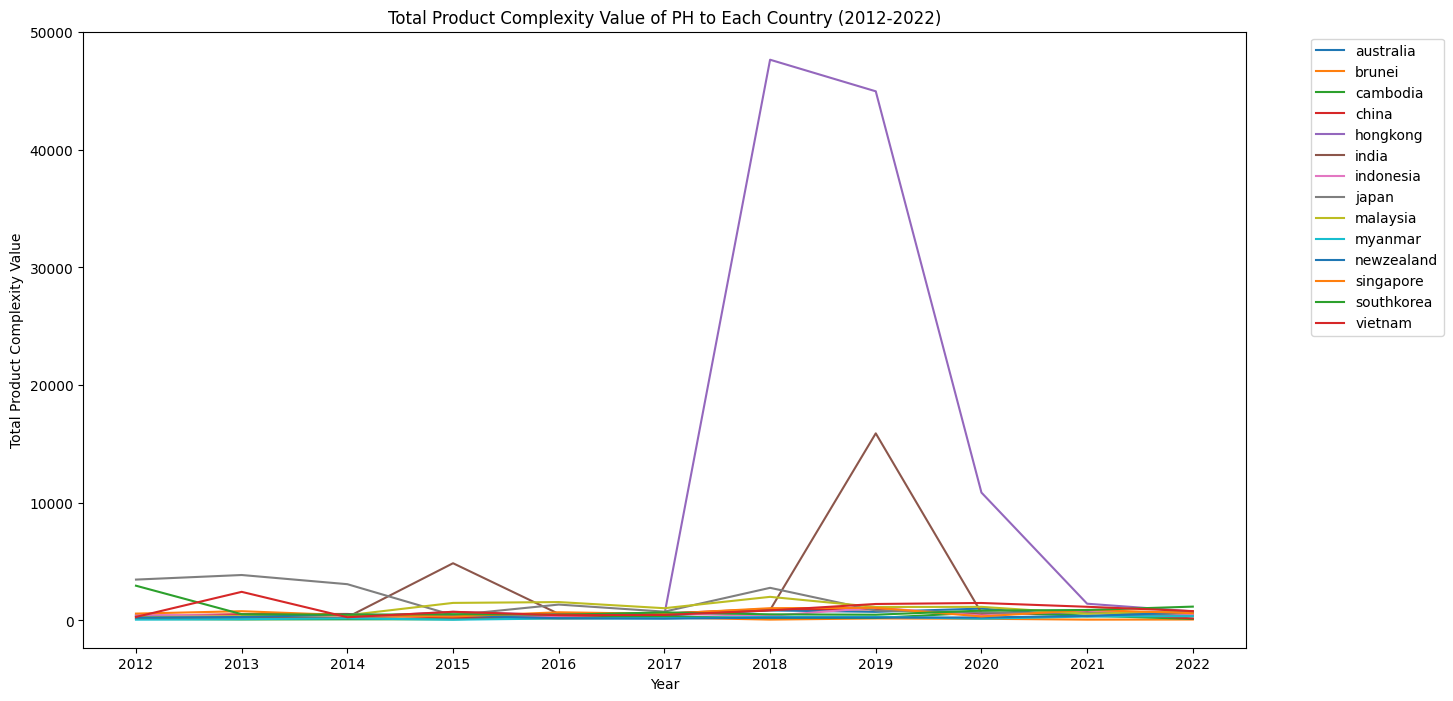

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
for country in complexity_df['Country'].unique():
    country_data = complexity_df[complexity_df['Country'] == country]
    yearly_values = country_data[['Average Value in 2012', 'Average Value in 2013', 'Average Value in 2014', 'Average Value in 2015',
                                  'Average Value in 2016', 'Average Value in 2017', 'Average Value in 2018', 'Average Value in 2019',
                                  'Average Value in 2020', 'Average Value in 2021', 'Average Value in 2022',]].sum()
    plt.plot(yearly_values, label=country)

plt.xlabel('Year')
plt.ylabel('Total Product Complexity Value')
plt.title('Total Product Complexity Value of PH to Each Country (2012-2022)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(len(yearly_values)), range(2012, 2023))
plt.show()

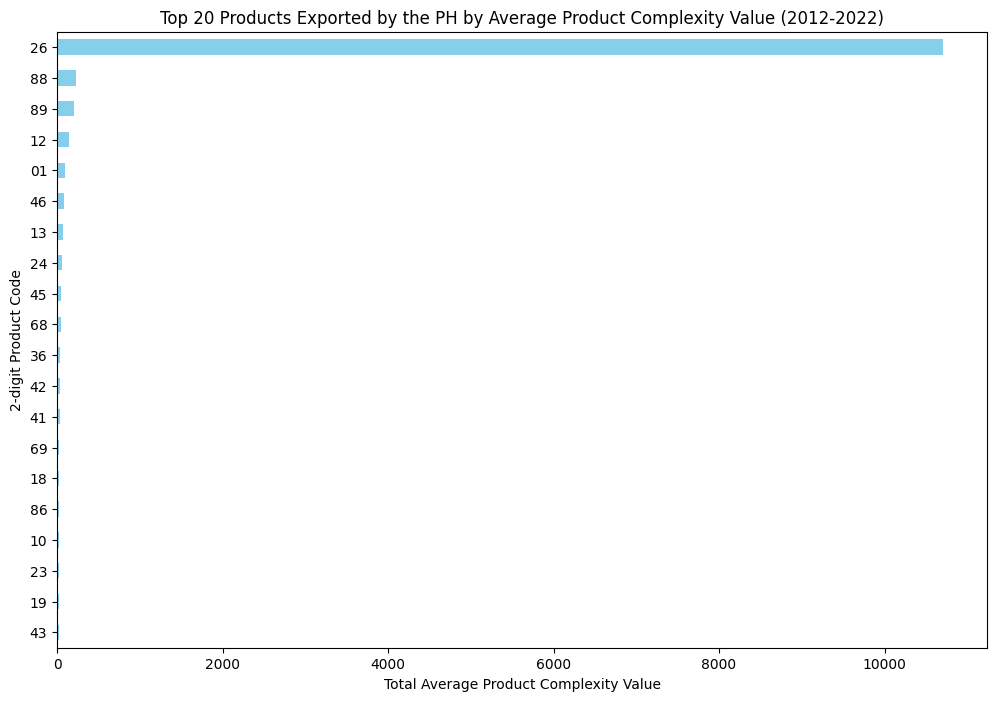

In [22]:
import matplotlib.pyplot as plt

# Assuming top_products is already computed
top_products = complexity_df.groupby('2-digit Product code')['Product Complexity Value'].sum().sort_values(ascending=False)
top_products_top10 = top_products.head(20)  # Top 10 products

# Create horizontal bar plot
plt.figure(figsize=(12, 8))
top_products_top10.plot(kind='barh', color='skyblue')
plt.xlabel('Total Average Product Complexity Value')
plt.ylabel('2-digit Product Code')
plt.title('Top 20 Products Exported by the PH by Average Product Complexity Value (2012-2022)')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.show()

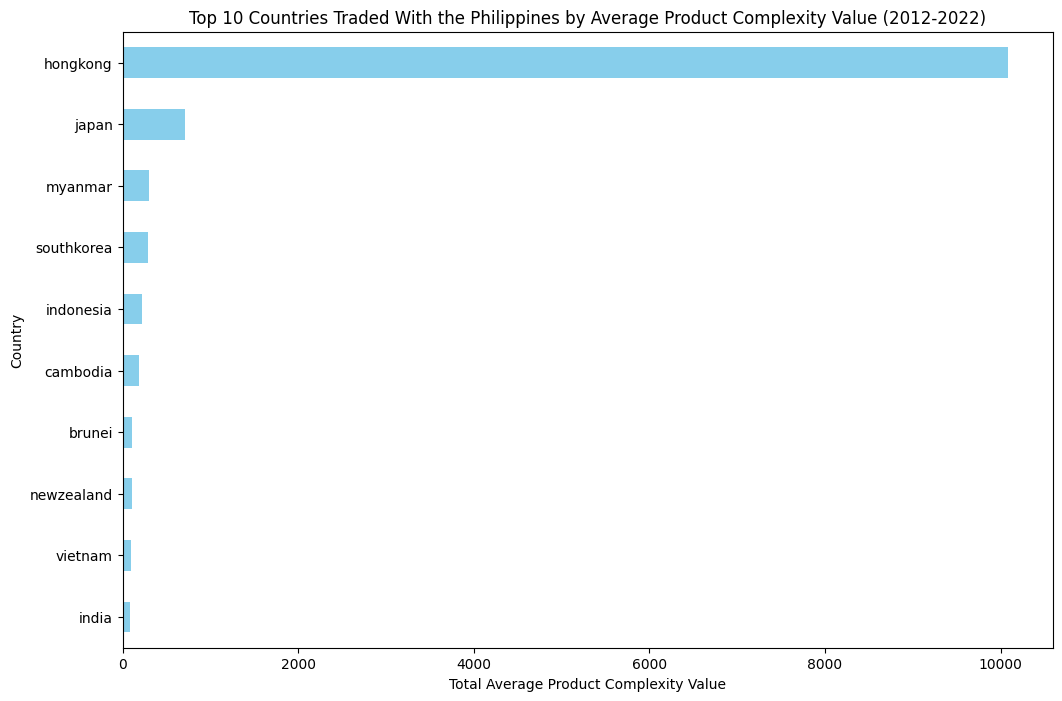

In [23]:
import matplotlib.pyplot as plt

# Assuming top_products is already computed
top_countries = complexity_df.groupby('Country')['Product Complexity Value'].sum().sort_values(ascending=False)
top_countries_top10 = top_countries.head(10)  # Top 10 products

# Create horizontal bar plot
plt.figure(figsize=(12, 8))
top_countries_top10.plot(kind='barh', color='skyblue')
plt.xlabel('Total Average Product Complexity Value')
plt.ylabel('Country')
plt.title('Top 10 Countries Traded With the Philippines by Average Product Complexity Value (2012-2022)')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.show()

# Modelling: Association Rule Learning


In [24]:
!pip install pyfim
from fim import arules, apriori, fpgrowth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyfim: filename=pyfim-6.28-cp310-cp310-linux_x86_64.whl size=644243 sha256=9ce5d1a9411adba206b85c8f2b88af30c6234e73382a8332a5c047e3ba59e9c1
  Stored in directory: /root/.cache/pip/wheels/96/0a/b3/c877bfa85c4cfe1baf3de4a89e1949382be09de5eabe49314f
Successfully built pyfim


###ARL by Quantity

In [25]:
import pandas as pd

# Assuming your dataframe is named 'df'
# Reshape the dataframe to have years and quantities in a long format
df_melted = quantity_df.melt(id_vars=['Country', '2-digit Product code'],
                    value_vars=['Quantity in 2012', 'Quantity in 2013', 'Quantity in 2014',
                                'Quantity in 2015', 'Quantity in 2016', 'Quantity in 2017',
                                'Quantity in 2018', 'Quantity in 2019', 'Quantity in 2020',
                                'Quantity in 2021', 'Quantity in 2022'],
                    var_name='Year', value_name='Quantity')

# Extract the year from the 'Year' column to create a clean year column
df_melted['Year'] = df_melted['Year'].str.extract('(\d+)')

# Sort the data by Country, Year, and Quantity in descending order
df_sorted = df_melted.sort_values(by=['Country', 'Year', 'Quantity'], ascending=[True, True, False])

# Group by Country and Year, then get the top 10 products for each group
top_10_per_country_year = df_sorted.groupby(['Country', 'Year']).head(10)

top_10_per_country_year

,Country,2-digit Product code,Year,Quantity
16,australia,26,2012,686116.0
74,australia,85,2012,19695.0
60,australia,70,2012,15812.0
10,australia,20,2012,8231.0
69,australia,80,2012,6666.0
...,...,...,...,...
14419,vietnam,74,2022,17772.0
14371,vietnam,26,2022,10801.0
14385,vietnam,40,2022,9487.0
14417,vietnam,72,2022,9437.0


In [26]:
top_10_per_country_year

import pandas as pd

# Assuming your dataframe is named 'df'
quantity_arl = top_10_per_country_year.drop(columns=['Quantity'])

quantity_arl

,Country,2-digit Product code,Year
16,australia,26,2012
74,australia,85,2012
60,australia,70,2012
10,australia,20,2012
69,australia,80,2012
...,...,...,...
14419,vietnam,74,2022
14371,vietnam,26,2022
14385,vietnam,40,2022
14417,vietnam,72,2022


In [27]:
#Group by Country
grouped_by_country = quantity_arl.groupby(['Country'])['2-digit Product code'].apply(list).reset_index()

#Group by YearMonth and Member_number
grouped_by_year_country = quantity_arl.groupby(['Year', 'Country'])['2-digit Product code'].apply(list).reset_index()

grouped_by_year_country

,Year,Country,2-digit Product code
0,2012,australia,"[26, 85, 70, 20, 80, 22, 34, 33, 68, 39]"
1,2012,brunei,"[48, 22, 20, 28, 21, 08, 19, 16, 85, 38]"
2,2012,cambodia,"[30, 17, 84, 85, 63, 48, 33, 27, 52, 24]"
3,2012,china,"[26, 27, 80, 44, 39, 29, 72, 17, 23, 10]"
4,2012,hongkong,"[89, 27, 08, 20, 03, 85, 84, 39, 44, 63]"
...,...,...,...
149,2022,myanmar,"[24, 39, 11, 56, 48, 30, 85, 94, 19, 63]"
150,2022,newzealand,"[08, 20, 85, 21, 19, 48, 84, 15, 13, 63]"
151,2022,singapore,"[25, 08, 89, 15, 29, 21, 28, 72, 26, 27]"
152,2022,southkorea,"[27, 80, 26, 23, 72, 20, 15, 74, 85, 40]"


In [28]:
from fim import arules, apriori, fpgrowth# Get the list of transactions grouped by country
transactions_by_country = grouped_by_year_country['2-digit Product code'].tolist()

supp = -2  # support threshold
conf = 40   # confidence threshold
report = 'bXcl'  # Report absolute, relative, confidence_pct, and lift value
result_country = arules(transactions_by_country, supp=supp, conf=conf, report=report)

#Convert result to DataFrame
colnames = ['consequent', 'antecedent'] + ['support_absolute', 'support_relative', 'confidence_pct', 'lift']
df_result_country = pd.DataFrame(result_country, columns=colnames)

# Sort the results by frequency
df_result_country = df_result_country.sort_values('support_absolute', ascending=False)  # sort to know significant/interesting
print(df_result_country.shape)
df_result_country

(149440, 6)


,consequent,antecedent,support_absolute,support_relative,confidence_pct,lift
0,85,(),154,100.000000,0.642857,1.000000
3,39,(),154,100.000000,0.584416,1.000000
24,20,(),154,100.000000,0.467532,1.000000
8,27,(),154,100.000000,0.525974,1.000000
61,84,(),154,100.000000,0.467532,1.000000
...,...,...,...,...,...,...
68791,08,"(33, 22, 19, 84, 20)",2,1.298701,1.000000,2.905660
68790,19,"(33, 22, 08, 84, 20)",2,1.298701,1.000000,2.905660
68789,84,"(33, 22, 08, 19, 20)",2,1.298701,1.000000,2.138889
68788,20,"(33, 22, 08, 19, 84)",2,1.298701,1.000000,2.138889


#ARL by Complexity

In [37]:
import pandas as pd

# Assuming your dataframe is named 'df'
# Reshape the dataframe to have years and quantities in a long format
df_melted_complex = complexity_df.melt(id_vars=['Country', '2-digit Product code'],
                    value_vars=['Average Value in 2012', 'Average Value in 2013', 'Average Value in 2014',
                                'Average Value in 2015', 'Average Value in 2016', 'Average Value in 2017',
                                'Average Value in 2018', 'Average Value in 2019', 'Average Value in 2020',
                                'Average Value in 2021', 'Average Value in 2022'],
                    var_name='Year', value_name='Average Value')

# Extract the year from the 'Year' column to create a clean year column
df_melted_complex['Year'] = df_melted_complex['Year'].str.extract('(\d+)')

# Sort the data by Country, Year, and Quantity in descending order
df_sorted_complex = df_melted_complex.sort_values(by=['Country', 'Year', 'Average Value'], ascending=[True, True, False])

# Group by Country and Year, then get the top 10 products for each group
top_10_complexity = df_sorted_complex.groupby(['Country', 'Year']).head(10)

top_10_complexity

,Country,2-digit Product code,Year,Average Value
77,australia,88,2012,305.789474
84,australia,95,2012,32.273155
76,australia,87,2012,18.399800
82,australia,93,2012,16.500000
20,australia,30,2012,14.058652
...,...,...,...,...
14427,vietnam,83,2022,19.524216
14391,vietnam,46,2022,14.500000
14405,vietnam,60,2022,11.333333
14409,vietnam,64,2022,10.527778


In [30]:
#Group by Country
grouped_by_country = top_10_complexity.groupby(['Country'])['2-digit Product code'].apply(list).reset_index()

#Group by YearMonth and Member_number
grouped_by_year_country = top_10_complexity.groupby(['Year', 'Country'])['2-digit Product code'].apply(list).reset_index()

grouped_by_year_country

,Year,Country,2-digit Product code
0,2012,australia,"[88, 95, 87, 93, 30, 96, 94, 13, 59, 24]"
1,2012,brunei,"[01, 87, 73, 95, 24, 34, 13, 83, 04, 15]"
2,2012,cambodia,"[95, 13, 58, 60, 34, 40, 90, 24, 52, 33]"
3,2012,china,"[88, 74, 95, 80, 83, 79, 54, 42, 28, 41]"
4,2012,hongkong,"[82, 97, 78, 59, 05, 80, 87, 49, 39, 53]"
...,...,...,...
149,2022,myanmar,"[12, 88, 42, 28, 33, 94, 95, 61, 48, 56]"
150,2022,newzealand,"[88, 89, 46, 63, 24, 32, 36, 23, 13, 94]"
151,2022,singapore,"[88, 28, 64, 60, 26, 94, 13, 06, 87, 33]"
152,2022,southkorea,"[88, 97, 69, 65, 89, 83, 49, 87, 41, 46]"


# Association Rule Learning Evaluation & Recommendations

#Quantity Value
The associated rule learning for this study first involved the trimming of the original data set to obtain the top ten products bought by each country per year. These lists of transactions were then subjected to ARL with a support threshold of -20 and a confidence threshold of 40%.

Analyzing the results according to the support absolute, we saw that there are five products that were bought by all countries in all 11 years of transaction -- these were [85, 84, 39, 27, and 20].

Looking at the lift values, the highest balue we got was at most 6.696 for [16] when [48 & 21] were involved in the transaction as well, which occured 23 times. Other grouping with a lift value over 6 involved either [16 or 13] with antecedents often involving [08, 19, 21, and 84] though all 4 do not necessarily have to be together in the transaction, at least two of them are always in the antecedent. However, they have confidence perfectages of less than 50%, signifying that they are still on the less likely side to be bought together.

Combining these observation, we thing that the Philippines should focus on the five (20, 27, 39, 84, and 85] products as they were amongst the products bought the most in the span of 11 years by all countries.

#Complexity Value
The associated rule learning for this study first involved trimming the original dataset to focus on the top ten products per product complexity per year. These lists of transactions were then subjected to ARL with a support threshold of -20 and a confidence threshold of 40. Analyzing the results according to the support absolute, we observed that for product codes [88] and [42], there are no antecedents (indicated by ()). This suggests that these products are frequently purchased on their own across various countries without being influenced by prior purchases, indicating a strong independent demand. For example, product [88] with a support value of 154 shows that it's a highly popular item, often acquired without any antecedent, highlighting its standalone significance in the market.

Now, moving on to the lift values, we found that the highest lift value was 3.08 for the product combination [74] -> [30], indicating that these products are purchased together much more frequently than expected by chance, suggesting a potential strategic opportunity for bundling or targeted marketing. Another significant relationship is seen with the combination [41, 88] -> [97], which has a lift of 2.57. This suggests that when products [41] and [88] are bought together, [97] is likely to be included, making it another key focus for strategic sales efforts.

#Recommendations
*   **Promote Diversification in Export Products:** The ARL results suggest that certain products, like codes 20, 42, 84, 85, and 88, are frequently exported independently, indicating strong demand. The government should encourage the expansion of these products into new markets, potentially leveraging their standalone significance to increase export volume.
Additionally, focus on encouraging industries to diversify into more complex products, particularly those that are frequently associated with high lift values, as they have a strong potential for bundled exports and value-added strategies.

*   **Develop Strategic Trade Policies for High-Lift Product Pairings:** The strong association between HS Code 74 (Copper and Articles) and HS Code 30 (Pharmaceutical Products) indicates the potential for bundled exports. The government should consider creating trade agreements that promote the joint export of these products, especially to countries with high demand for both. Additionally, supporting local industries in these sectors through incentives and reducing tariffs on necessary inputs could boost their international competitiveness.

# Modelling: Cluster Analysis

We will use our aggregated dataset *aggregated_data* to operate our clustering analysis: what we want to do is to compare the 99 products by measuring how similar or different they are to each other, based on their average export values, acting as proxy for how complex a product is.

In [32]:
import pandas as pd
from google.colab import drive

# Mounting Google Drive
drive.mount('/content/drive')

# Defining Paths
paths = {
    "myanmar": ['/content/drive/My Drive/final project/myanmar.xlsx', '/content/drive/My Drive/final project/myanmar (1).xlsx'],
    "newzealand": ['/content/drive/My Drive/final project/new zealand.xlsx', '/content/drive/My Drive/final project/new zealand (1).xlsx'],
    "australia": ['/content/drive/My Drive/final project/australia.xlsx', '/content/drive/My Drive/final project/australia (1).xlsx'],
    "southkorea": ['/content/drive/My Drive/final project/south korea.xlsx', '/content/drive/My Drive/final project/south korea (1).xlsx'],
    "japan": ['/content/drive/My Drive/final project/japan.xlsx', '/content/drive/My Drive/final project/japan (1).xlsx'],
    "india": ['/content/drive/My Drive/final project/india.xlsx', '/content/drive/My Drive/final project/india (1).xlsx'],
    "hongkong": ['/content/drive/My Drive/final project/hongkong.xlsx', '/content/drive/My Drive/final project/hongkong (1).xlsx'],
    "china": ['/content/drive/My Drive/final project/china.xlsx', '/content/drive/My Drive/final project/china (1).xlsx'],
    "malaysia": ['/content/drive/My Drive/final project/malaysia.xlsx', '/content/drive/My Drive/final project/malaysia (1).xlsx'],
    "vietnam": ['/content/drive/My Drive/final project/vietnam.xlsx', '/content/drive/My Drive/final project/vietnam (1).xlsx'],
    "indonesia": ['/content/drive/My Drive/final project/indonesia.xlsx', '/content/drive/My Drive/final project/indonesia (1).xlsx'],
    "brunei": ['/content/drive/My Drive/final project/brunei darussalam.xlsx', '/content/drive/My Drive/final project/brunei darussalam (1).xlsx'],
    "cambodia": ['/content/drive/My Drive/final project/cambodia.xlsx', '/content/drive/My Drive/final project/cambodia (1).xlsx'],
    "singapore": ['/content/drive/My Drive/final project/singapore.xlsx', '/content/drive/My Drive/final project/singapore (1).xlsx']
}

# Merging and processing for calculation of Average Value for years 2012-2022 as proxy for Complexity
def process_country_data(value_path, quantity_path, country_name):
    value_df = pd.read_excel(value_path)
    quantity_df = pd.read_excel(quantity_path)
    merged_df = pd.merge(value_df, quantity_df, on='Product code', how='inner')

    # Convert 3-digit product codes to 4-digit product codes
    merged_df['Product code'] = merged_df['Product code'].apply(lambda x: f'{x:04}')

    # Create 2-digit Product code column
    merged_df['2-digit Product code'] = merged_df['Product code'].str[:2]

    for year in range(2012, 2023):
        merged_df[f'Average Value in {year}'] = merged_df[f'Value in {year}'] / merged_df[f'Quantity in {year}']
        # Handling infinity values by replacing with NaN, and later NaN with 0
        merged_df[f'Average Value in {year}'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)

    merged_df['Country'] = country_name
    return merged_df[['Product label_x', 'Product code', '2-digit Product code', 'Country'] +
                     [f'Value in {year}' for year in range(2012, 2023)] +
                     [f'Quantity in {year}' for year in range(2012, 2023)] +
                     [f'Average Value in {year}' for year in range(2012, 2023)]]

# Processing and storing for each country
countries = {country: process_country_data(paths[country][0], paths[country][1], country) for country in paths}

# Concatenating all dataframes into one
exportdata = pd.concat(countries.values(), ignore_index=True)

# Aggregating data by 2-digit Product code and year
aggregated_data = exportdata.groupby('2-digit Product code').agg({
    **{f'Value in {year}': 'sum' for year in range(2012, 2023)},
    **{f'Quantity in {year}': 'sum' for year in range(2012, 2023)},
    **{f'Average Value in {year}': 'mean' for year in range(2012, 2023)},
}).reset_index()

# Replacing NaN values in Average Value columns with 0
for year in range(2012, 2023):
    aggregated_data[f'Average Value in {year}'].fillna(0, inplace=True)

# Display the aggregated dataframe
aggregated_data

columns_to_drop = [f'Value in {year}' for year in range(2012, 2023)] + \
                  [f'Quantity in {year}' for year in range(2012, 2023)]

# Drop the specified columns
aggregated_data = aggregated_data.drop(columns=columns_to_drop)

# Display the updated dataframe
aggregated_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,2-digit Product code,Average Value in 2012,Average Value in 2013,Average Value in 2014,Average Value in 2015,Average Value in 2016,Average Value in 2017,Average Value in 2018,Average Value in 2019,Average Value in 2020,Average Value in 2021,Average Value in 2022
0,01,42.277915,11.445178,11.995243,32.000000,55.000000,31.500000,15.122222,13.166667,14.666667,3.909091,2.482759
1,02,0.718478,1.473214,1.032738,0.000000,0.607143,2.212766,1.500000,1.428571,2.117647,4.955357,0.000000
2,03,3.843636,4.589622,5.028827,4.934698,6.022113,5.966253,7.057341,8.454718,6.727517,7.390307,7.274420
3,04,3.098290,3.802703,2.957684,3.568645,3.135779,2.097388,2.600169,2.469550,3.676144,4.050003,3.130706
4,05,14.867121,1.425454,1.555545,5.237227,10.806061,1.462500,14.875000,6.445119,6.500000,5.974359,7.724138
...,...,...,...,...,...,...,...,...,...,...,...,...
92,94,11.053023,9.545859,9.682750,12.710087,9.630547,9.203768,15.460720,34.952891,24.990060,20.679602,11.431172
93,95,19.397058,21.794485,19.347404,21.834222,17.386981,20.386403,19.034045,15.478643,21.348976,14.177631,10.860977
94,96,20.639204,26.999820,20.334679,35.880318,42.410866,32.911483,25.939921,29.531159,21.292729,36.043421,28.125497
95,97,11.627711,26.531936,15.215705,15.045726,60.008143,12.886117,44.315554,78.893889,50.937500,68.781134,139.857143


# Importing relevant libraries

We first import relevant libraries to be used for our standardization of data, k-means clustering, and calculation of clustering performance metrics.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
import numpy as np

# Standardizing Data

We then standardize our data to a range from 0 to 1 to make it the values comparable across product codes.

In [34]:
# Standardize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(aggregated_data.drop(columns=['2-digit Product code']))

# Clustering Performance Metrics

Several metrics will be used for assessing our clustering performance: performance refer to how well we clustered our products.

- Sum of Squared Errors: Measures how close the data points are to the centroid(center) of the cluster. Lower SSE means that products are tightly clustered,

- Calinski Harabasz Index: Measures the ratio of the sum of between-cluster dispersion (separation and definition of clusters) and the within-cluster dispersion (that is, how dispersed the products are within one cluster). Higher value suggests well-defined clusters.

- Silhouette score: Positive silhouette score suggests that a data point (product) is rightly clustered, while a negative score suggests otherwise.

- Davies Bouldin Index: A lower Davies-Bouldin Index suggests better clustering.

In [35]:
# K-Means Clustering
sum_of_squared_errors = []
silhouette = []
chi = []
dbi = []

k_list = range(2, 15)
for k in k_list:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    sum_of_squared_errors.append(km.inertia_)

    labels = km.labels_
    silhouette.append(silhouette_score(X, labels, metric='euclidean'))
    chi.append(calinski_harabasz_score(X, labels))
    dbi.append(davies_bouldin_score(X, labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

# Determining Optimal number of clusters and clustering of products

The optimal number of clusters is determined using the Elbow Method. The products are then clustered to *k* number of clusters based on the results of the Elbow Method. A distribution plot of the clustering and summary statistics are also shown.

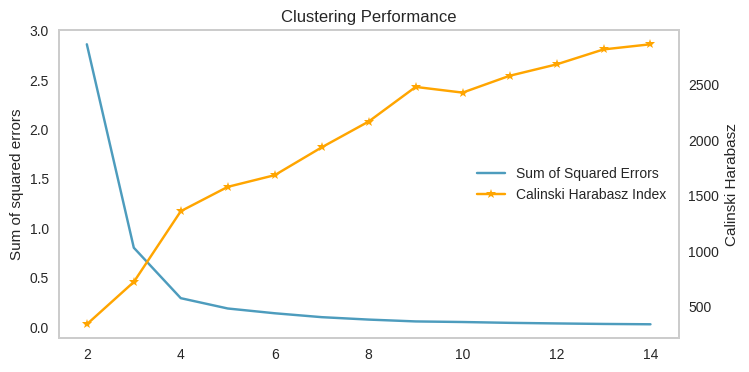

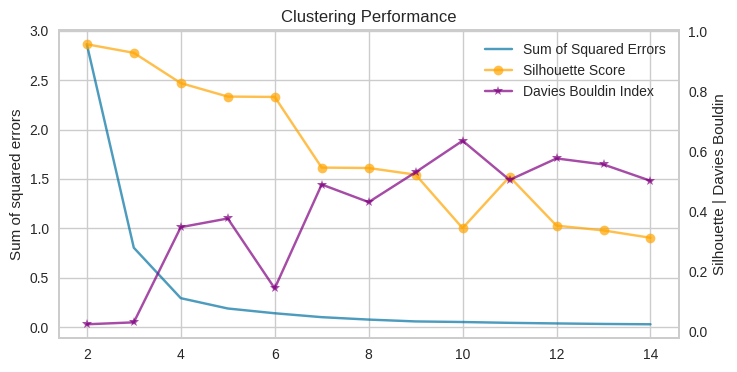

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

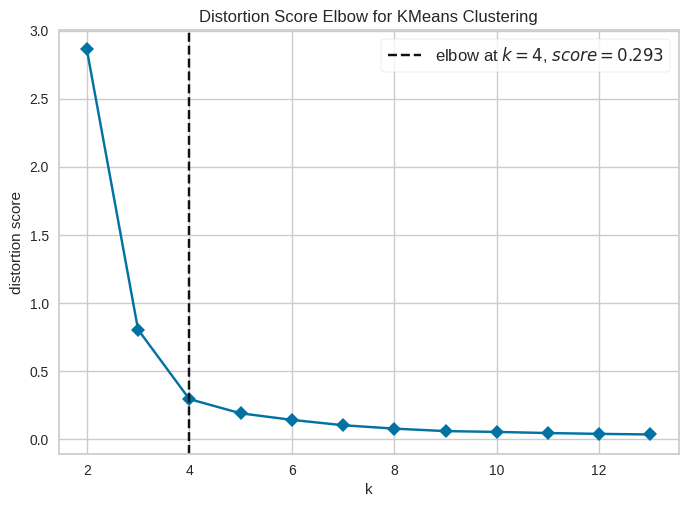

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


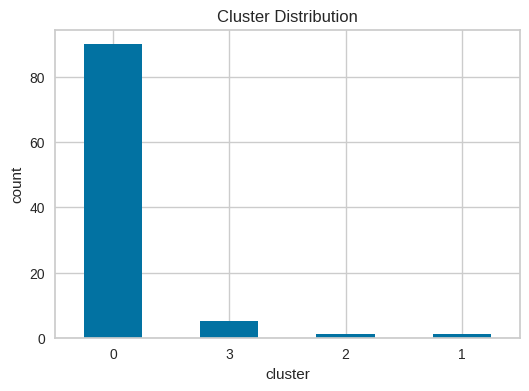


Cluster 0:
   2-digit Product code
0                    01
1                    02
2                    03
3                    04
4                    05
..                  ...
85                   94
86                   95
87                   96
88                   97
89                   99

[90 rows x 1 columns]

Cluster 1:
  2-digit Product code
0                   71

Cluster 2:
  2-digit Product code
0                   26

Cluster 3:
  2-digit Product code
0                   67
1                   85
2                   88
3                   90
4                   91

Summary Statistics for Cluster 0:


,Average Value in 2012,Average Value in 2013,Average Value in 2014,Average Value in 2015,Average Value in 2016,Average Value in 2017,Average Value in 2018,Average Value in 2019,Average Value in 2020,Average Value in 2021,Average Value in 2022,Cluster
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0
mean,13.134848,13.064120,11.827898,10.321046,11.960420,13.828190,14.327428,14.112554,17.559936,16.021546,15.341378,0.0
std,25.426782,15.347568,13.139177,9.610309,14.447430,22.727529,19.055722,18.107658,29.819613,25.569039,24.644989,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.129190,2.625029,3.685621,3.575544,3.356593,2.574174,2.844022,4.174476,3.669036,4.369518,3.424723,0.0
50%,6.540431,7.330545,7.118086,6.762132,7.591549,6.762735,8.030141,8.070263,8.524211,8.124465,9.258320,0.0
75%,14.267539,16.866029,14.812566,14.244086,12.824039,13.778323,17.553410,16.794376,19.462848,14.392157,14.531604,0.0
max,215.657496,75.000000,74.131292,39.605633,80.000000,167.119269,99.153225,91.769457,192.374459,169.701439,160.425185,0.0



Summary Statistics for Cluster 1:


,Average Value in 2012,Average Value in 2013,Average Value in 2014,Average Value in 2015,Average Value in 2016,Average Value in 2017,Average Value in 2018,Average Value in 2019,Average Value in 2020,Average Value in 2021,Average Value in 2022,Cluster
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
mean,1102.530103,1002.182447,1907.233811,1674.424065,1727.946611,3086.227922,3514.703527,3549.088611,1742.041116,1897.750805,1979.590824,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1102.530103,1002.182447,1907.233811,1674.424065,1727.946611,3086.227922,3514.703527,3549.088611,1742.041116,1897.750805,1979.590824,1.0
25%,1102.530103,1002.182447,1907.233811,1674.424065,1727.946611,3086.227922,3514.703527,3549.088611,1742.041116,1897.750805,1979.590824,1.0
50%,1102.530103,1002.182447,1907.233811,1674.424065,1727.946611,3086.227922,3514.703527,3549.088611,1742.041116,1897.750805,1979.590824,1.0
75%,1102.530103,1002.182447,1907.233811,1674.424065,1727.946611,3086.227922,3514.703527,3549.088611,1742.041116,1897.750805,1979.590824,1.0
max,1102.530103,1002.182447,1907.233811,1674.424065,1727.946611,3086.227922,3514.703527,3549.088611,1742.041116,1897.750805,1979.590824,1.0



Summary Statistics for Cluster 2:


,Average Value in 2012,Average Value in 2013,Average Value in 2014,Average Value in 2015,Average Value in 2016,Average Value in 2017,Average Value in 2018,Average Value in 2019,Average Value in 2020,Average Value in 2021,Average Value in 2022,Cluster
count,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
mean,1262.14824,500.793277,457.535009,529.785246,421.115177,6.446879,1713.707709,1774.817926,826.031319,1.959987,2.364281,2.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1262.14824,500.793277,457.535009,529.785246,421.115177,6.446879,1713.707709,1774.817926,826.031319,1.959987,2.364281,2.0
25%,1262.14824,500.793277,457.535009,529.785246,421.115177,6.446879,1713.707709,1774.817926,826.031319,1.959987,2.364281,2.0
50%,1262.14824,500.793277,457.535009,529.785246,421.115177,6.446879,1713.707709,1774.817926,826.031319,1.959987,2.364281,2.0
75%,1262.14824,500.793277,457.535009,529.785246,421.115177,6.446879,1713.707709,1774.817926,826.031319,1.959987,2.364281,2.0
max,1262.14824,500.793277,457.535009,529.785246,421.115177,6.446879,1713.707709,1774.817926,826.031319,1.959987,2.364281,2.0



Summary Statistics for Cluster 3:


,Average Value in 2012,Average Value in 2013,Average Value in 2014,Average Value in 2015,Average Value in 2016,Average Value in 2017,Average Value in 2018,Average Value in 2019,Average Value in 2020,Average Value in 2021,Average Value in 2022,Cluster
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0
mean,137.133739,153.511299,147.484946,188.697908,168.541567,261.086819,390.289126,214.818109,206.794365,203.974137,224.788885,3.0
std,26.434381,71.805542,67.647876,111.239554,99.520421,248.007373,364.614296,100.777158,100.613011,78.971912,80.695371,0.0
min,113.402503,104.652867,83.449502,93.986517,104.531908,88.706162,150.576565,140.402815,140.313974,129.723617,150.443614,3.0
25%,119.647433,110.466349,117.839947,99.919852,108.867596,125.981111,152.750263,147.875971,141.525387,161.786599,171.963549,3.0
50%,123.782986,128.840136,119.925433,132.995602,133.841022,128.572156,158.990061,153.756689,173.742080,175.393583,177.150753,3.0
75%,153.036508,144.788681,157.033963,286.659692,152.307935,276.512901,506.482076,259.502924,196.620941,220.263889,302.685450,3.0
max,175.799266,278.808462,259.175887,329.927879,343.159375,685.661765,982.646667,372.552147,381.769444,332.702997,321.701059,3.0


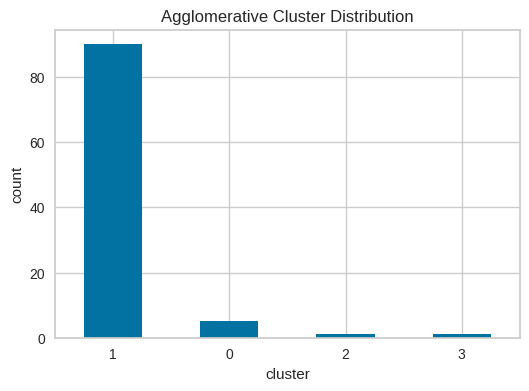


Agglomerative Cluster 0:
  2-digit Product code
0                   67
1                   85
2                   88
3                   90
4                   91

Agglomerative Cluster 1:
   2-digit Product code
0                    01
1                    02
2                    03
3                    04
4                    05
..                  ...
85                   94
86                   95
87                   96
88                   97
89                   99

[90 rows x 1 columns]

Agglomerative Cluster 2:
  2-digit Product code
0                   26

Agglomerative Cluster 3:
  2-digit Product code
0                   71

Summary Statistics for Agglomerative Cluster 0:


,Average Value in 2012,Average Value in 2013,Average Value in 2014,Average Value in 2015,Average Value in 2016,Average Value in 2017,Average Value in 2018,Average Value in 2019,Average Value in 2020,Average Value in 2021,Average Value in 2022,Cluster,Agg_Cluster
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.0
mean,137.133739,153.511299,147.484946,188.697908,168.541567,261.086819,390.289126,214.818109,206.794365,203.974137,224.788885,3.0,0.0
std,26.434381,71.805542,67.647876,111.239554,99.520421,248.007373,364.614296,100.777158,100.613011,78.971912,80.695371,0.0,0.0
min,113.402503,104.652867,83.449502,93.986517,104.531908,88.706162,150.576565,140.402815,140.313974,129.723617,150.443614,3.0,0.0
25%,119.647433,110.466349,117.839947,99.919852,108.867596,125.981111,152.750263,147.875971,141.525387,161.786599,171.963549,3.0,0.0
50%,123.782986,128.840136,119.925433,132.995602,133.841022,128.572156,158.990061,153.756689,173.742080,175.393583,177.150753,3.0,0.0
75%,153.036508,144.788681,157.033963,286.659692,152.307935,276.512901,506.482076,259.502924,196.620941,220.263889,302.685450,3.0,0.0
max,175.799266,278.808462,259.175887,329.927879,343.159375,685.661765,982.646667,372.552147,381.769444,332.702997,321.701059,3.0,0.0



Summary Statistics for Agglomerative Cluster 1:


,Average Value in 2012,Average Value in 2013,Average Value in 2014,Average Value in 2015,Average Value in 2016,Average Value in 2017,Average Value in 2018,Average Value in 2019,Average Value in 2020,Average Value in 2021,Average Value in 2022,Cluster,Agg_Cluster
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0,90.0
mean,13.134848,13.064120,11.827898,10.321046,11.960420,13.828190,14.327428,14.112554,17.559936,16.021546,15.341378,0.0,1.0
std,25.426782,15.347568,13.139177,9.610309,14.447430,22.727529,19.055722,18.107658,29.819613,25.569039,24.644989,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,3.129190,2.625029,3.685621,3.575544,3.356593,2.574174,2.844022,4.174476,3.669036,4.369518,3.424723,0.0,1.0
50%,6.540431,7.330545,7.118086,6.762132,7.591549,6.762735,8.030141,8.070263,8.524211,8.124465,9.258320,0.0,1.0
75%,14.267539,16.866029,14.812566,14.244086,12.824039,13.778323,17.553410,16.794376,19.462848,14.392157,14.531604,0.0,1.0
max,215.657496,75.000000,74.131292,39.605633,80.000000,167.119269,99.153225,91.769457,192.374459,169.701439,160.425185,0.0,1.0



Summary Statistics for Agglomerative Cluster 2:


,Average Value in 2012,Average Value in 2013,Average Value in 2014,Average Value in 2015,Average Value in 2016,Average Value in 2017,Average Value in 2018,Average Value in 2019,Average Value in 2020,Average Value in 2021,Average Value in 2022,Cluster,Agg_Cluster
count,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
mean,1262.14824,500.793277,457.535009,529.785246,421.115177,6.446879,1713.707709,1774.817926,826.031319,1.959987,2.364281,2.0,2.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1262.14824,500.793277,457.535009,529.785246,421.115177,6.446879,1713.707709,1774.817926,826.031319,1.959987,2.364281,2.0,2.0
25%,1262.14824,500.793277,457.535009,529.785246,421.115177,6.446879,1713.707709,1774.817926,826.031319,1.959987,2.364281,2.0,2.0
50%,1262.14824,500.793277,457.535009,529.785246,421.115177,6.446879,1713.707709,1774.817926,826.031319,1.959987,2.364281,2.0,2.0
75%,1262.14824,500.793277,457.535009,529.785246,421.115177,6.446879,1713.707709,1774.817926,826.031319,1.959987,2.364281,2.0,2.0
max,1262.14824,500.793277,457.535009,529.785246,421.115177,6.446879,1713.707709,1774.817926,826.031319,1.959987,2.364281,2.0,2.0



Summary Statistics for Agglomerative Cluster 3:


,Average Value in 2012,Average Value in 2013,Average Value in 2014,Average Value in 2015,Average Value in 2016,Average Value in 2017,Average Value in 2018,Average Value in 2019,Average Value in 2020,Average Value in 2021,Average Value in 2022,Cluster,Agg_Cluster
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
mean,1102.530103,1002.182447,1907.233811,1674.424065,1727.946611,3086.227922,3514.703527,3549.088611,1742.041116,1897.750805,1979.590824,1.0,3.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1102.530103,1002.182447,1907.233811,1674.424065,1727.946611,3086.227922,3514.703527,3549.088611,1742.041116,1897.750805,1979.590824,1.0,3.0
25%,1102.530103,1002.182447,1907.233811,1674.424065,1727.946611,3086.227922,3514.703527,3549.088611,1742.041116,1897.750805,1979.590824,1.0,3.0
50%,1102.530103,1002.182447,1907.233811,1674.424065,1727.946611,3086.227922,3514.703527,3549.088611,1742.041116,1897.750805,1979.590824,1.0,3.0
75%,1102.530103,1002.182447,1907.233811,1674.424065,1727.946611,3086.227922,3514.703527,3549.088611,1742.041116,1897.750805,1979.590824,1.0,3.0
max,1102.530103,1002.182447,1907.233811,1674.424065,1727.946611,3086.227922,3514.703527,3549.088611,1742.041116,1897.750805,1979.590824,1.0,3.0


In [36]:
# Plot Elbow Method for Optimal k
alpha = 0.7
fig, ax = plt.subplots(1,1, figsize=(8,4), dpi=100)
lns1 = ax.plot(k_list, sum_of_squared_errors, 'x-', alpha=alpha, label='Sum of Squared Errors')
ax.set_ylabel('Sum of squared errors')
ax.grid(False)

ax2 = ax.twinx()
ax2.set_ylabel('Calinski Harabasz')
ax2.grid(False)
lns2 = ax2.plot(k_list, chi, '*-', color='orange', label='Calinski Harabasz Index')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=5)

plt.xlabel('k')
plt.title('Clustering Performance')
plt.show()

# Plot Silhouette Score and Davies Bouldin Index
alpha = 0.7
fig, ax = plt.subplots(1,1, figsize=(8,4), dpi=100)
lns1 = ax.plot(k_list, sum_of_squared_errors, 'x-', alpha=alpha, label='Sum of Squared Errors')
ax.set_ylabel('Sum of squared errors')

ax2 = ax.twinx()
ax2.set_ylabel('Silhouette | Davies Bouldin')
ax2.grid(False)
lns2 = ax2.plot(k_list, silhouette, 'o-', color='orange', alpha=alpha, label='Silhouette Score')
lns3 = ax2.plot(k_list, dbi, '*-', color='purple', alpha=alpha, label='Davies Bouldin Index')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

plt.xlabel('k')
plt.title('Clustering Performance')
plt.show()

# Determine optimal k using KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,14), timings=False)
visualizer.fit(X)
visualizer.show()

# Clustering using K-means with optimal k (e.g., k=4)
optimal_k = 4
km = KMeans(n_clusters=optimal_k, random_state=42)
km.fit(X)
labels = km.labels_

# Add cluster labels to the dataframe
aggregated_data['Cluster'] = labels

# Cluster distribution
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
aggregated_data['Cluster'].value_counts().plot(kind='bar', ax=ax)
plt.xticks(rotation=0)
plt.ylabel('count')
plt.xlabel('cluster')
plt.title('Cluster Distribution')
plt.show()

# Display products in each cluster
for cluster in range(optimal_k):
    print(f'\nCluster {cluster}:')
    cluster_products = aggregated_data[aggregated_data['Cluster'] == cluster]
    print(cluster_products[['2-digit Product code']].drop_duplicates().reset_index(drop=True))

# Summary statistics for each cluster
for cluster in range(optimal_k):
    print(f'\nSummary Statistics for Cluster {cluster}:')
    display(aggregated_data[aggregated_data['Cluster'] == cluster].describe())

# Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_clustering.fit_predict(X)

# Add cluster labels to the dataframe
aggregated_data['Agg_Cluster'] = agg_labels

# Cluster distribution for Agglomerative Clustering
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
aggregated_data['Agg_Cluster'].value_counts().plot(kind='bar', ax=ax)
plt.xticks(rotation=0)
plt.ylabel('count')
plt.xlabel('cluster')
plt.title('Agglomerative Cluster Distribution')
plt.show()

# Display products in each Agglomerative cluster
for cluster in range(optimal_k):
    print(f'\nAgglomerative Cluster {cluster}:')
    cluster_products = aggregated_data[aggregated_data['Agg_Cluster'] == cluster]
    print(cluster_products[['2-digit Product code']].drop_duplicates().reset_index(drop=True))

# Summary statistics for each Agglomerative cluster
for cluster in range(optimal_k):
    print(f'\nSummary Statistics for Agglomerative Cluster {cluster}:')
    display(aggregated_data[aggregated_data['Agg_Cluster'] == cluster].describe())

# Cluster Analysis Evaluation/Results

We have the following findings from our cluster analysis:

1. Export Products of the Philippines based on their average values from 2012-2013, are best clustered into groups.

2. The most highly valued/complex products are products with HS codes 26 and 71, being clusters of themselves. These products are



# Recommendations & Conclusion

Our cluster analysis makes imperative of the fact that the government along with firms within the private sector can further capture profit or revenue gains by leveraging on exportation opportunities by strengthening production of goods in high-value export sectors. Among these goods are  *Ores, slag, and ash*, and *Natural or cultured pearls, precious or semi-precious stones, precious metals, metals clad with precious metal, and articles thereof; imitation jewellery; coin*. Both the public and private sector should accomodate appeals for investments through Public-Private Partnerships such that gains are captured at the same time issues on consumption and production sustainability and intertemporal inconsistencies are addressed.

Industrial organization within these sectors is also necessary to equitably transfer these value added across all sectors-- vertical and horizontal integration vis-a-vis assessments of structure-conduct-performance can help integrate and production and consumption processes and behaviors, at the same time minimize economic inefficiencies by enabling better market coordination/control and diffusion of knowledge/technologies, accessing new competitive strategies, preventing market failures, realizing cost synergies, and promoting any market-related strategies. Industrial policies should also promote stronger exporting ties with the usual trading partners of the Philippines, especially when it comes to the minimization of cost (electrical and transportation costs) of casting facilities for core concentrates.

Focusing on the other cluster groupings meanwhile, many of the products are low-valued, hence an observable over-concentration or overproduction of these products. It is at the government and the firms' helm can the diversification of the export base can happen (from production of low value added products to that of high value added products)-- either through PPPs or tax breaks and production subsidies. Several niches can also be built by isolated industries-- it is say to say that there are more gains to realize from the feather articles industry.

Lastly and above all, within and between sectors diffusion of technology, knowledge and innovation must be supported to strengthen value creation within export-oriented industries.

# References

Hidalgo, C. A., Klinger, B., Barabási, A. L., & Hausmann, R. (2007). The product space conditions the development of nations. Science, 317(5837), 482-487.

Felipe, J., Kumar, U., Abdon, A., & Bacate, M. (2012). Product complexity and economic development. Structural Change and Economic Dynamics, 23(1), 36-68.
